<a href="https://colab.research.google.com/github/dhruvvk14/VGGT_Testing/blob/main/VGGT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

installing dependencies

In [4]:
!pip install vggt@git+https://github.com/facebookresearch/vggt.git
!pip install open3d

  Cloning https://github.com/facebookresearch/vggt.git to /tmp/pip-install-x8i7mu3b/vggt_74ee52fd22ca4ba1bb27eecfe17fb8b8
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/vggt.git /tmp/pip-install-x8i7mu3b/vggt_74ee52fd22ca4ba1bb27eecfe17fb8b8
  Resolved https://github.com/facebookresearch/vggt.git to commit e56963328b7476e615ce8dda9164d381f8dc07a3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


all imports

In [5]:
import torch
from vggt.models.vggt import VGGT
from vggt.utils.load_fn import load_and_preprocess_images

import the model

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
#use float32 cuz no gpu
dtype = torch.float32
model = VGGT.from_pretrained("facebook/VGGT-1B").to(device)


these are our predictions.

In [7]:
image_names = ["pfp.png"]
images = load_and_preprocess_images(image_names).to(device)
preds = []
with torch.no_grad():
    with torch.cuda.amp.autocast(dtype=dtype):

        predictions = model(images)
        preds.append(predictions)

/tmp/ipython-input-3195590690.py:5: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(dtype=dtype):
/usr/local/lib/python3.12/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/vggt/models/vggt.py:65: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


tensor stuff.

to be honest, i didn't quite get what this part was.

edit1: turns out my first video was for math/physics, which is completely different...

edit2: its just matrices but the math in nn is quicker idk how tho i wanna research this more ngl

In [8]:
print("Length: ", len(preds))
for predictions in preds:
  print (predictions)

Length:  1
{'pose_enc': tensor([[[ 4.9675e-05, -1.0561e-04, -7.5646e-05, -9.8802e-06, -9.6734e-05,
           1.3180e-04,  1.0001e+00,  2.8894e-01,  2.8624e-01]]]), 'pose_enc_list': [tensor([[[ 2.4034e-05, -1.6216e-04,  6.7035e-06, -4.8034e-06,  1.5562e-04,
           1.3687e-04,  1.0003e+00,  2.8960e-01,  2.8630e-01]]]), tensor([[[ 3.9169e-05, -1.3479e-04, -3.6945e-05, -2.6407e-05,  5.7374e-06,
           1.4375e-04,  1.0002e+00,  2.8930e-01,  2.8624e-01]]]), tensor([[[ 4.6089e-05, -1.1712e-04, -6.0706e-05, -1.4440e-05, -6.1857e-05,
           1.3815e-04,  1.0001e+00,  2.8909e-01,  2.8623e-01]]]), tensor([[[ 4.9675e-05, -1.0561e-04, -7.5646e-05, -9.8802e-06, -9.6734e-05,
           1.3180e-04,  1.0001e+00,  2.8894e-01,  2.8624e-01]]])], 'depth': tensor([[[[[1.0192],
           [1.0024],
           [1.0026],
           ...,
           [1.1557],
           [1.1573],
           [1.1600]],

          [[1.0101],
           [0.9981],
           [0.9989],
           ...,
           [1.1566],

In [9]:
import numpy as np
import open3d as o3d



not gonna lie this entire code was GPTed, just wanted to get a visualization of the point-map.

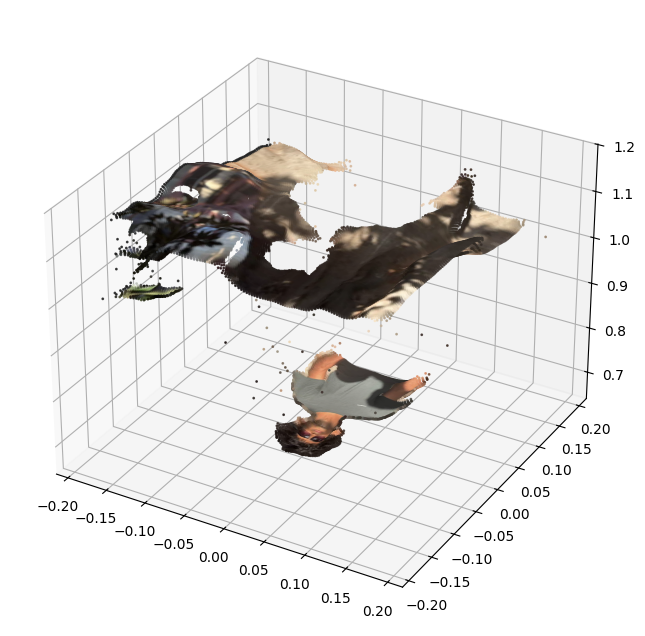

In [19]:
import matplotlib.pyplot as plt
from PIL import Image

# 1️⃣ Take preprocessed image
img_tensor = images[0].permute(1, 2, 0).cpu().numpy()
colors = (img_tensor - img_tensor.min()) / (img_tensor.max() - img_tensor.min())

# 2️⃣ Flatten points & confidence
points = world_points.reshape(-1, 3).cpu().numpy()
conf_values = conf.reshape(-1).cpu().numpy()

# 3️⃣ Mask by confidence
threshold = 1.2
mask = conf_values > threshold
points = points[mask]
colors = colors.reshape(-1, 3)[mask]

# 4️⃣ Optional subsample
points = points[::5]
colors = colors[::5]

# 5️⃣ Plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors, alpha=0.8)
plt.show()


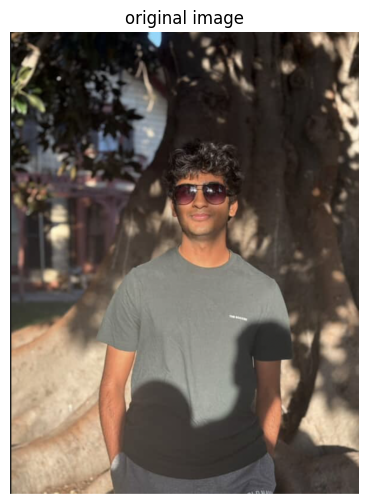

In [18]:
img = Image.open("pfp.png").convert("RGB")
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.title("original image")
plt.show()